# Holdout Validation

For this example, we’ll use a linear regression on the scikit-learn database of California housing data.

In [1]:
from sklearn import datasets
# import california housing data from sklearn and store data into a variable
calihouses= datasets.fetch_california_housing()
calidata= calihouses.data

In [5]:
import pandas as pd
import numpy as np

# define the columns names of the data then convert to dataframe
headers= calihouses.feature_names
df= pd.DataFrame(calidata, columns=headers)

print(df.shape)
print(df)

(20640, 8)
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        

In holdout validation, we split the data into a training and testing set. The training set will be what the model is created on and the testing data will be used to validate the generated model.

In [8]:
# first store all target data to a variable
y = calihouses.target
# create testing and training sets for hold-out verification using scikit learn method
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.25)
# validate set shapes
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(15480, 8) (15480,)
(5160, 8) (5160,)


 we’ll use scikit learn to make our lives a little easier. I’ve included a few lines to time the runtime of the function, which we will use for later comparison.

In [10]:
# time function using .time methods for later comparison
from timeit import default_timer as timer
start_ho = timer()

# fit a model using linear model method from sklearn
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

# generate predictions
predictions = lm.predict(X_test)

end_ho = timer()

# calcualte function runtime
time_ho = (end_ho - start_ho)
# show predictions
print(predictions)



[2.94117362 1.97685848 2.22312998 ... 0.88180024 1.9370425  2.54990228]


## Evaluation

Now that we have a model, and have created some predictions, let’s go though with our holdout validation.
We’ll start by graphing our given target data vs our predicted target data to give us a visualization of how our model performs.

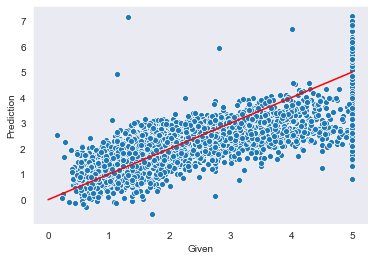

In [11]:
# import seaborn and plotly
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
# set viz style
sns.set_style('dark')

# plot the model
plot= sns.scatterplot(y_test, predictions)
plot.set(xlabel='Given', ylabel='Prediction')

# generate and graph y = x line
x_plot= np.linspace(0,5,100)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')

Now, lets get a score for the model to evaluate it against later methods.

In [12]:
start_ho_score = timer()
# model score (neg_mean_squared_error)
from sklearn import metrics
ho_score = -1*metrics.mean_squared_error(y_test, predictions)
print(ho_score)
end_ho_score = timer()
ho_score_time = (end_ho_score - start_ho_score)

-0.5258724619440821


As model complexity increases, error due to bias decreases, while error due to variance increases, creating the bias-variance trade-off, 

### Bias

Bias is the error resulting from the difference between the expected value(s) of a model and the actual (or “correct”) value(s) for which we want to predict over multiple iterations. In the scientific concepts of accuracy and precision, bias is very similar to accuracy.

### Variance

Variance is defined as the error resulting from the variability between different data predictions in a model. In variance, the correct value(s) don’t matter as much as the range of differences in value between the predictions. Variance also comes into play more when we run multiple model creation trials.

# Cross Validation

Cross validation is a method of model validation which splits the data in creative ways in order to obtain the better estimates of “real world” model performance, and minimize validation error.

### F-Folds Cross Validation

K-fold validation is a popular method of cross validation which shuffles the data and splits it into k number of folds (groups). In general K-fold validation is performed by taking one group as the test data set, and the other k-1 groups as the training data, fitting and evaluating a model, and recording the chosen score. This process is then repeated with each fold (group) as the test data and all the scores averaged to obtain a more comprehensive model validation score. As a general rule, as k increases, bias decreases and variance increases.

## Evaluation

We’ll make use of a linear model again, but this time do model validation with scikit learn’s cross_val_predict method which will do most of the heavy lifting in generating K-Fold predictions. In this case, I chose to set k=10.

In [14]:
from sklearn.model_selection import cross_val_predict
# store data as an array
X = np.array(df)
# again, timing the function for comparison
start_kfold = timer()
# use cross_val_predict to generate K-Fold predictions
lm_k = linear_model.LinearRegression()
k_predictions = cross_val_predict(lm_k, X, y, cv=10)
print(k_predictions)
end_kfold = timer()
kfold_time = (end_kfold - start_kfold)

[4.22358985 4.04800271 3.75534521 ... 0.14474758 0.29600522 0.49525933]


‘cross_val_predict’ takes the model used on the data, the input and target data, as well as a ‘cv’ argument — which is essentially our k value — and returns the predicted values for each input. Now we can plot the predictions as we did with the hold out method.

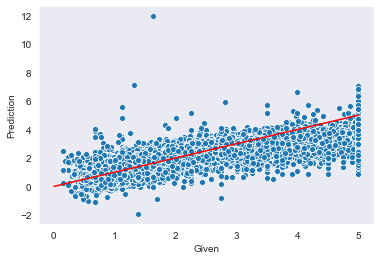

In [15]:
# plot k-fold predictions against actual
plot_k = sns.scatterplot(y, k_predictions)
plot_k.set(xlabel='Given', ylabel='Prediction')
# generate and graph y = x line
x_plot = np.linspace(0,5,100)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')

-0.5509524296956663


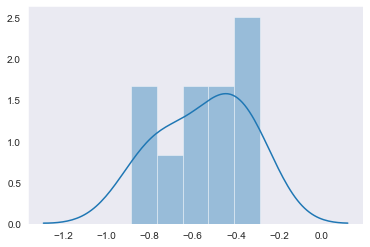

In [17]:
from sklearn.model_selection import cross_val_score
# Now let’s get the scores of the 10 generated models and plot them into a visualization.
kfold_score_start = timer()
# find the mean score from the k-fold models usinf cross_val_score
kfold_scores = cross_val_score(lm_k, X, y, cv=10, scoring='neg_mean_squared_error')
print(kfold_scores.mean())
kfold_score_end = timer()
kfold_score_time = (kfold_score_end - kfold_score_start)
# plot scores
sns.distplot(kfold_scores, bins=5)

You’ll notice that the score is a little farther from zero than the holdout method (not good).

# Leave One Out Cross Validation

Leave One Out Cross Validation (LOOCV) can be considered a type of K-Fold validation where k=n given n is the number of rows in the dataset. Other than that the methods are quire similar. You will notice, however, that running the following code will take much longer than previous methods. We’ll dig into that later.

Let’s work an example with the same dataset, following the same process and modifying k:

## Evaluation

In [18]:
# Generate Prediction
start_LOO = timer()
# generate LOO predictions
LOO_predictions = cross_val_predict(lm_k, X, y, cv=(len(X)))
end_LOO = timer()
LOO_time = (end_LOO - start_LOO)


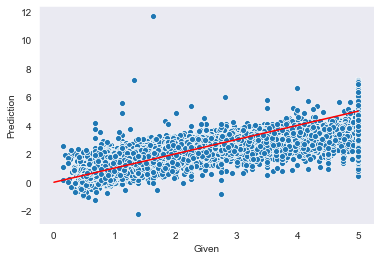

In [19]:
# Plot the predictions:
# plot LOO predictions against actual
plot_LOO = sns.scatterplot(y, LOO_predictions)
plot_LOO.set(xlabel='Given', ylabel='Prediction')
# generate and graph y = x line
x_plot = np.linspace(0,5,100)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')

In [20]:
# Generate and average scores:
LOO_score_start = timer()
# find the mean score from the LOO models using cross_val_score 
LOO_score = cross_val_score(lm_k, X, y, cv=(len(X)), scoring='neg_mean_squared_error').mean()
print(LOO_score)
LOO_score_end = timer()
LOO_score_time = (LOO_score_end - LOO_score_start)

-0.5282462043712458


# Methods Comparisions

In [21]:
print("Hold out method took", time_ho, "seconds to generate a model and", ho_score_time ,"seconds to generate a MSE of", ho_score)
print("K-Fold method took", kfold_time, 'seconds to generate a model and', kfold_score_time, 'seconds to generate a MSE of', kfold_scores.mean())
print("Leave One Out Cross Validation method took", LOO_time, 'seconds to generate a model and', LOO_score_time, 'seconds to generate a MSE of', LOO_score)

Hold out method took 0.48084997699993437 seconds to generate a model and 0.0012121190000016213 seconds to generate a MSE of -0.5258724619440821
K-Fold method took 0.09310284999992291 seconds to generate a model and 0.11617819799994322 seconds to generate a MSE of -0.5509524296956663
Leave One Out Cross Validation method took 142.87165212799982 seconds to generate a model and 147.33057972299957 seconds to generate a MSE of -0.5282462043712458


# When to use which

As we noticed in the results of our comparison, we can see that the LOOCV method takes way longer to complete than our other two. This is because that method creates and evaluates a model for each row in the dataset, in this case over 20,000. Even though our MSE is a little lower, this may not be worth it given the additional computational requirements. Here are some heuristics which can help in choosing a method.

## Hold out method

The hold out method can be effective and computationally inexpensive on very large datasets, or on limited computational resources. It is also often easier to implement and understand for beginners. However, it is very rarely good to apply to small datasets as it can significantly reduce the training data available and hurt model performance.

## K-Fold Cross Validation

K-Fold can be very effective on medium sized datasets, though by adjusting the K value can significantly alter the results of the validation. Let’s add to our rule from earlier; as k increases, bias decreases, and variance and computational requirements increase. K-Fold cross validation is likely the most common of the three methods due to the versatility of adjusting K-values.

## Leave One Out Cross Validation (LOOCV)

LOOCV is most useful in small datasets as it allows for the smallest amount of data to be removed from the training data in each iteration. However, in large datasets the process of generating a model for each row in the dataset can be incredibly computationally expensive and thus prohibitive for larger datasets.

## Advantages/Disadvantages

### Holdout Validation

In holdout validation, we are doing nothing more than performing a simple train/test split in which we fit our model to our training data and apply it to our testing data to generate predicted values. We “hold out” the testing data to be strictly used for prediction purposes only. Holdout validation is NOT a cross validation technique. But we must discuss the standard method of model evaluation so that we can compare its attributes with the actual cross validation techniques.

However, holdout validation does not preserve the statistical integrity of the dataset in many cases. For instance, a holdout validation that splits the data into training and testing segments causes bias by not incorporating the testing data into the model. The testing data could contain some important observations. This would result in a detriment to the accuracy of the model. Furthermore, this will cause an underfitting and overfitting of the data in addition to an introduction of validation and/or training error.

### K-Fold

In K-fold cross validation, we answer many of the problems inherent in holdout validation such as underfitting/overfitting and validation and training error. This is done by using all of the observations in our validation set at some iteration. We compute an average accuracy score of all the accuracy scores that are calculated in each k iteration. By doing so, we minimize bias and variation that may be present in our initial model evaluation technique, holdout validation.


However, in terms of computational power, k-fold cross validation is very costly. The computer has to perform several iterations to generate a proper accuracy score. The accuracy score of the model will in theory increase with each added k iteration. This will decrease bias while increasing variation.

### LOOCV

LOOCV is very similar to K-fold, with a special case in which k is equal to the length (or number of samples/rows) of the whole dataset. Thus the training set will be of length k-1, and the testing set will be a single sample of the data. LOOCV is particularly useful in the case that our data set is not large enough to sensibly do Kfold. LOOCV is also less computationally expensive in general, although it is usually due to the inherently smaller datasets that tend utilize it.

However, LOOCV tends to yield high variance due to the fact that the method would pick up on all of the possible noise and outlier values in the data through the individual testing values. LOOCV would be very computationally expensive for very large data sets; in this case, it would be better to use regular k-fold.